# Remove redudant features (Multicollinearity)

In [1]:
import os
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from dcor import distance_correlation


In [2]:
input_dir = './data/input/features/'
output_dir = './data/output/figures/clustermaps/'


try: os.mkdir(output_dir)
except: pass

In [3]:
import datetime as dt

def gen_timestamp():
    timestamp = '{:%Y-%m-%d-%H-%M-%S}'.format(dt.datetime.now())
    return timestamp


In [4]:
# Color code ticklabels
vocal_folds = 'dodgerblue'
intensity = 'limegreen'
vocal_tract = 'crimson'
spectral = 'darkviolet'
prosodic = 'slategrey'

egemaps_category_dict = {
    'F0semitoneFrom27.5Hz_sma3nz_amean': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': vocal_folds, 
        'loudness_sma3_amean': intensity,
       'loudness_sma3_stddevNorm': intensity, 
        'loudness_sma3_percentile20.0': intensity,
       'loudness_sma3_percentile50.0': intensity, 
        'loudness_sma3_percentile80.0': intensity,
       'loudness_sma3_pctlrange0-2': intensity, 
        'loudness_sma3_meanRisingSlope': intensity,
       'loudness_sma3_stddevRisingSlope': intensity, 
        'loudness_sma3_meanFallingSlope': intensity,
       'loudness_sma3_stddevFallingSlope': intensity,
        'spectralFlux_sma3_amean': spectral,
       'spectralFlux_sma3_stddevNorm':spectral,
        'mfcc1_sma3_amean': spectral,
       'mfcc1_sma3_stddevNorm': spectral, 
    'mfcc2_sma3_amean': spectral, 
    'mfcc2_sma3_stddevNorm': spectral,
       'mfcc3_sma3_amean': spectral, 
    'mfcc3_sma3_stddevNorm': spectral, 
    'mfcc4_sma3_amean': spectral,
       'mfcc4_sma3_stddevNorm': spectral, 
    'jitterLocal_sma3nz_amean': vocal_folds,
       'jitterLocal_sma3nz_stddevNorm': vocal_folds, 
    'shimmerLocaldB_sma3nz_amean': vocal_folds,
       'shimmerLocaldB_sma3nz_stddevNorm': vocal_folds, 
        'HNRdBACF_sma3nz_amean': intensity,
       'HNRdBACF_sma3nz_stddevNorm': intensity,  
        'logRelF0-H1-H2_sma3nz_amean': spectral,
       'logRelF0-H1-H2_sma3nz_stddevNorm': spectral, 
        'logRelF0-H1-A3_sma3nz_amean': spectral,
       'logRelF0-H1-A3_sma3nz_stddevNorm': spectral, 
        'F1frequency_sma3nz_amean': vocal_tract,
       'F1frequency_sma3nz_stddevNorm': vocal_tract, 
        'F1bandwidth_sma3nz_amean': vocal_tract,
       'F1bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F1amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F1amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'F2frequency_sma3nz_amean': vocal_tract,
       'F2frequency_sma3nz_stddevNorm': vocal_tract, 
        'F2bandwidth_sma3nz_amean': vocal_tract,
       'F2bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F2amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F2amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'F3frequency_sma3nz_amean': vocal_tract,
       'F3frequency_sma3nz_stddevNorm': vocal_tract, 
        'F3bandwidth_sma3nz_amean': vocal_tract,
       'F3bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F3amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F3amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'alphaRatioV_sma3nz_amean': spectral,
       'alphaRatioV_sma3nz_stddevNorm': spectral, 
        'hammarbergIndexV_sma3nz_amean': spectral,
       'hammarbergIndexV_sma3nz_stddevNorm': spectral, 
        'slopeV0-500_sma3nz_amean': spectral,
       'slopeV0-500_sma3nz_stddevNorm': spectral, 
        'slopeV500-1500_sma3nz_amean': spectral,
       'slopeV500-1500_sma3nz_stddevNorm': spectral, 
        'spectralFluxV_sma3nz_amean': spectral,
       'spectralFluxV_sma3nz_stddevNorm': spectral, 
        'mfcc1V_sma3nz_amean': spectral,
       'mfcc1V_sma3nz_stddevNorm': spectral, 
        'mfcc2V_sma3nz_amean': spectral,
       'mfcc2V_sma3nz_stddevNorm': spectral, 
        'mfcc3V_sma3nz_amean': spectral,
       'mfcc3V_sma3nz_stddevNorm': spectral, 
        'mfcc4V_sma3nz_amean': spectral,
       'mfcc4V_sma3nz_stddevNorm': spectral, 
        'alphaRatioUV_sma3nz_amean': spectral,
       'hammarbergIndexUV_sma3nz_amean': spectral, 
        'slopeUV0-500_sma3nz_amean': spectral,
       'slopeUV500-1500_sma3nz_amean': spectral, 
        'spectralFluxUV_sma3nz_amean': spectral,
       'loudnessPeaksPerSec': prosodic, 
        'VoicedSegmentsPerSec': prosodic,
       'MeanVoicedSegmentLengthSec': prosodic, 
        'StddevVoicedSegmentLengthSec': prosodic,
       'MeanUnvoicedSegmentLength': prosodic, 
        'StddevUnvoicedSegmentLength': prosodic,
       'equivalentSoundLevel_dBp': intensity,
}

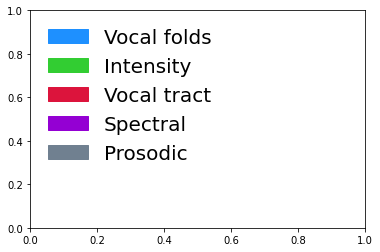

In [5]:
savefig = False
leg = plt.legend(handles=[
    mpatches.Patch(color=vocal_folds, label='Vocal folds'),
    mpatches.Patch(color=intensity, label='Intensity'),
    mpatches.Patch(color=vocal_tract, label='Vocal tract'),
    mpatches.Patch(color=spectral, label='Spectral'),
    mpatches.Patch(color=prosodic, label='Prosodic'),
], loc ='upper left', bbox_to_anchor=(0,1), frameon=False, prop={'size': 20})
if savefig:
    plt.savefig(f'./data/output/figures/colorcode_legend_{gen_timestamp()}.png', dpi=300)

In [6]:

def pairwise_dcor(df):
    features = list(df.columns)
    combs = list(itertools.combinations(features, 2))
    combs = [n for n in combs if n[0] != n[1]] #remove diagonal
    df2 = pd.DataFrame(index=features, columns=features)
    correlations = []
    print('Running...')
    print(f'amount of pairwise correlations out of {len(combs)}')
    for i, pair in enumerate(combs):
        if i%500==0:
            print(i)
        feature0 = pair[0]
        feature1 = pair[1]
        x0 = df.loc[:,feature0]
        x1 = df.loc[:,feature1]
        c = distance_correlation(x0,x1)
        df2.loc[feature0, feature1] = c
        correlations.append([c, feature0, feature1])
                
    df2 = df2.fillna(0)
    df2 = df2 + df2.T - np.diag(np.diag(df2))
    df2 = df2.replace({0:1})
    return df2
    
    

In [7]:
# Load egemaps
egemaps = pd.read_csv(input_dir+'egemaps_vector_both.csv', index_col=0)
egemaps = egemaps.drop(['sid','token','target', 'filename'], axis=1)

In [8]:
egemaps

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,38.72469,0.074773,37.18876,38.47970,40.44019,3.251423,37.94022,15.84932,206.4527,360.75950,...,-0.020086,-0.002822,0.131253,6.017192,2.325582,0.323750,0.279148,0.086250,0.056111,-36.04536
1,41.11026,0.121323,37.82011,40.29837,42.86220,5.042088,65.27183,67.44999,107.0295,136.12460,...,-0.030845,-0.001601,0.057944,3.724928,1.749271,0.271667,0.260411,0.276667,0.294430,-37.11591
2,40.64695,0.103110,38.43892,40.61772,43.04973,4.610809,70.18970,41.75834,143.7980,158.40300,...,-0.026844,-0.003204,0.118944,5.157593,3.498543,0.175000,0.168201,0.118889,0.079365,-36.20234
3,30.43643,0.271136,21.39732,35.07611,37.99580,16.598470,520.01150,754.83490,113.2329,72.07719,...,-0.035889,-0.006141,0.116599,3.724928,3.197675,0.174545,0.154176,0.116364,0.093738,-40.33198
4,32.12006,0.241961,22.38828,35.72247,37.69841,15.310130,1028.64100,954.45980,159.6470,112.48600,...,-0.046613,-0.006085,0.118889,5.730659,4.081633,0.121429,0.107628,0.120833,0.178814,-39.28465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,32.00000,0.006370,31.80000,32.00000,32.20000,0.363000,2.65000,1.12000,2.8100,1.38000,...,-0.017300,0.003450,0.011400,2.440000,0.496000,1.960000,1.270000,0.040000,0.000000,-52.40000
454,31.60000,0.006140,31.40000,31.60000,31.80000,0.338000,3.36000,0.84200,3.3000,1.35000,...,0.000000,0.000000,0.000000,3.660000,0.248000,4.030000,0.000000,0.000000,0.000000,-52.00000
455,28.20000,0.118000,28.90000,29.10000,29.30000,0.418000,31.40000,22.00000,41.8000,0.00000,...,0.000000,0.000000,0.000000,3.170000,0.248000,4.030000,0.000000,0.000000,0.000000,-43.60000
456,28.30000,0.015700,28.10000,28.30000,28.50000,0.388000,7.03000,5.36000,6.6000,4.35000,...,0.000000,0.000000,0.000000,2.440000,0.248000,4.030000,0.000000,0.000000,0.000000,-44.20000


In [10]:
# # Run pairwise dcore (This take a few minutes)
# df2 = pairwise_dcor(egemaps)

In [ ]:
df2.shape

In [32]:
# Created in shap_analysis.ipynb
import json
top_features_dir = './data/output/figures/'
rank_df = pd.read_csv(top_features_dir+f'1-5_feature_name_rank.csv')

rank_df

,data_type,feature_name,rank
0,both,equivalentSoundLevel_dBp,1/5
1,both,loudnessPeaksPerSec,2/5
2,both,mfcc1V_sma3nz_amean,3/5
3,both,F1frequency_sma3nz_amean,4/5
4,both,F0semitoneFrom27.5Hz_sma3nz_amean,5/5
5,speech,equivalentSoundLevel_dBp,1/5
6,speech,shimmerLocaldB_sma3nz_stddevNorm,2/5
7,speech,F1amplitudeLogRelF0_sma3nz_amean,3/5
8,speech,mfcc1V_sma3nz_amean,4/5
9,speech,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,5/5


In [11]:
# # Plot
# savefig = False
# image_size = (30,30)
# sns.set(font_scale = 0.4)

# #right-left, up-down?, x, y
# cbar_pos=(0.85, 0.84, 0.03, 0.12) #cbar_pos=(1, 0,0.05, 0.18) # cbar_pos=(0.02, 0.8, 0.05, 0.18)(0.02, 1, 0.05, 0.18)

# plt.figure(figsize=image_size)
# cg = sns.clustermap(df2, cbar_pos=cbar_pos,cbar_kws={'label': 'Distance correlation'})#, vmin=0, vmax=1)#, cmap = 'OrRd_r')

# # plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# for xtick,ytick in zip(cg.ax_heatmap.yaxis.get_majorticklabels(),cg.ax_heatmap.xaxis.get_majorticklabels()):
#     xtick_text = xtick.get_text()
#     ytick_text = ytick.get_text()
#     xtick_predefined_color = egemaps_category_dict.get(xtick_text)
#     ytick_predefined_color = egemaps_category_dict.get(ytick_text)
#     xtick.set_color(xtick_predefined_color)
#     ytick.set_color(ytick_predefined_color)

# leg = plt.legend(handles=[
#     mpatches.Patch(color=vocal_folds, label='Vocal folds'),
#     mpatches.Patch(color=intensity, label='Intensity'),
#     mpatches.Patch(color=vocal_tract, label='Vocal tract'),
#     mpatches.Patch(color=spectral, label='Spectral'),
#     mpatches.Patch(color=prosodic, label='Prosodic'),
# ], loc ='upper left', bbox_to_anchor=(2.3,0.78), frameon=False, prop={'size': 6})

# # plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('w')
# leg.get_frame().set_linewidth(0.0)
    
# if savefig:
#     plt.savefig(output_dir+'clustermap_dcor_both_coloredticks.png', dpi=300)


# Make a function and loop through all datasets

In [45]:
def add_rank_to_feature_name(df,rank_df_i ):
    cols = df.columns.values
    indexes = df.index.values
    for col in cols:
        if col in rank_df_i['feature_name'].values:
            feature_rank = rank_df_i[rank_df_i['feature_name']==col]['rank'].values[0]
#             col_new = r'\underline{%s}' %col
            df =df.rename(columns = {col:r'***'+feature_rank+r'*** '+col}, index = {col:r'***'+feature_rank+r'*** '+col})
#             xtext_new = [f'\underline{%col}' %x for x in xtext[0]]
    return df

          

In [46]:
def dcor_clustermap(df, output_dir = './', group='both', data_type = 'both', rank_df=None, savefig = True, color_code = True):
    


#     plt.rc('text', usetex=True)


    #right-left, up-down?, x, y
    cbar_pos=(0.85, 0.84, 0.03, 0.12) #cbar_pos=(1, 0,0.05, 0.18) # cbar_pos=(0.02, 0.8, 0.05, 0.18)(0.02, 1, 0.05, 0.18)

    # add rank
    rank_df_i = rank_df[rank_df.data_type==data_type]
    df = add_rank_to_feature_name(df,rank_df_i )
    cg = sns.clustermap(df, cbar_pos=cbar_pos,cbar_kws={'label': 'Distance correlation'})#, vmin=0, vmax=1)#, cmap = 'OrRd_r')
    
    '''
    Automatically add text #https://stackoverflow.com/questions/27913674/matplotlib-get-axis-relative-tick-positions
    '''
    
    
    if color_code:
        # plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
        for xtick,xtick_location,ytick,ytick_location  in zip(cg.ax_heatmap.yaxis.get_majorticklabels(),
                               cg.ax_heatmap.xaxis.get_majorticklocs(),
                               cg.ax_heatmap.xaxis.get_majorticklabels(),
                               cg.ax_heatmap.yaxis.get_majorticklocs(),
                              ):
            xtick_text = xtick.get_text()
            ytick_text = ytick.get_text()
            

            for n in range(1,6):
                xtick_text  = xtick_text .replace(f'***{n}/5*** ', '').replace(r'\underline{', '').replace('}', '')
                
            xtick_predefined_color = egemaps_category_dict.get(xtick_text )
            xtick.set_color(xtick_predefined_color)
            ytick.set_color(xtick_predefined_color)
        
            if '***' in xtick_text or  '***' in ytick_text:
                xtick.set_weight('black')
                ytick.set_weight('black') #https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontweight
            else:
                xtick.set_weight('light')
                ytick.set_weight('light') #https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontweight
#                 xtick.set_bbox(dict(facecolor='red', alpha=0.5, mutation_scale=0.1)) #edgecolor
#                 ytick.set_bbox(dict(facecolor='red', alpha=0.5, mutation_scale=0.1)) #edgecolor
#                 xtick.set_backgroundcolor('gray')                
        
        # Legend
        leg = plt.legend(handles=[
            mpatches.Patch(color=vocal_folds, label='Vocal folds'),
            mpatches.Patch(color=intensity, label='Intensity'),
            mpatches.Patch(color=vocal_tract, label='Vocal tract'),
            mpatches.Patch(color=spectral, label='Spectral'),
            mpatches.Patch(color=prosodic, label='Prosodic'),
        ], loc ='upper left', bbox_to_anchor=(2.3,0.78), frameon=False, prop={'size': 6})

        # plt.legend(frameon=False)
        leg.get_frame().set_edgecolor('w')
        leg.get_frame().set_linewidth(0.0)

    if savefig:
        plt.savefig(output_dir+f'clustermap_dcor_datatype-{data_type}_group-{group}_coloredticks_{gen_timestamp()}.png', dpi=300)


Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500
Running...
amount of pairwise correlations out of 3828
0
500
1000
1500
2000
2500
3000
3500


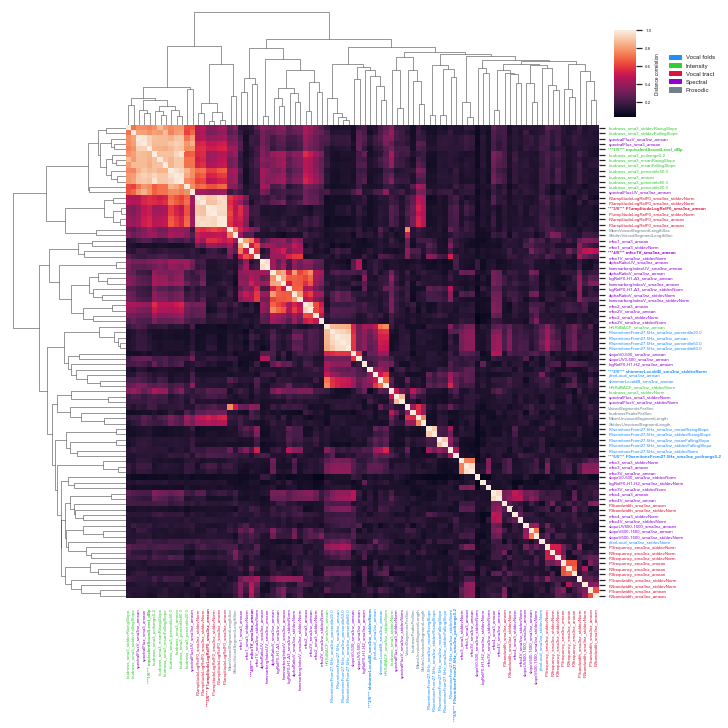

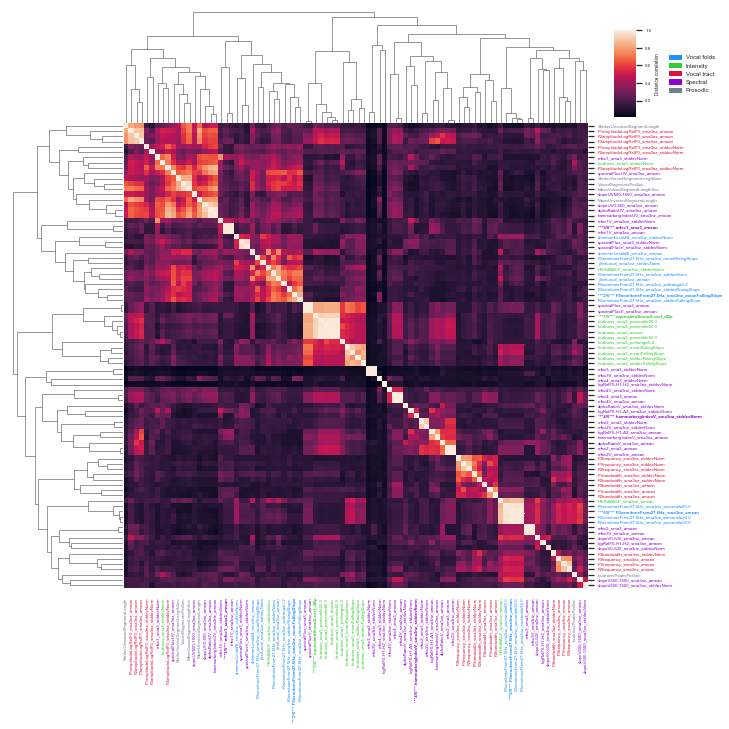

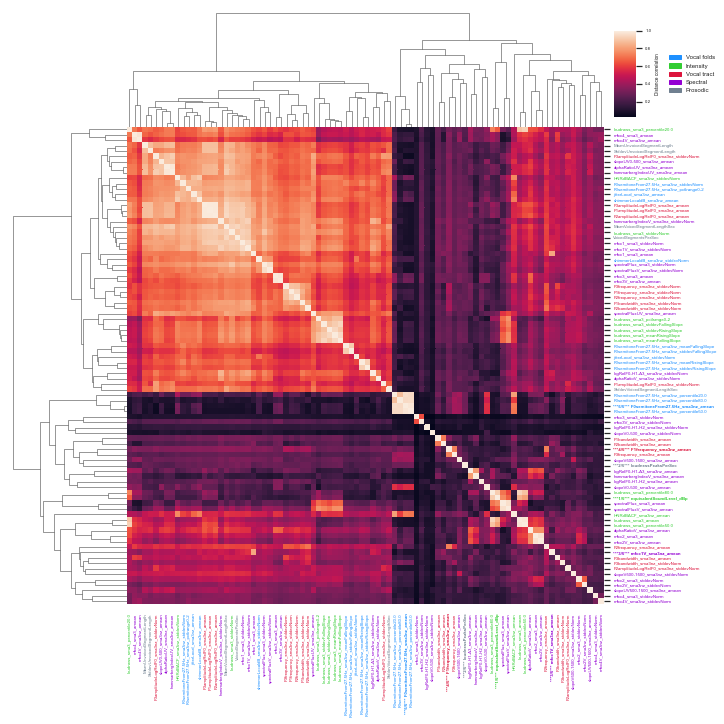

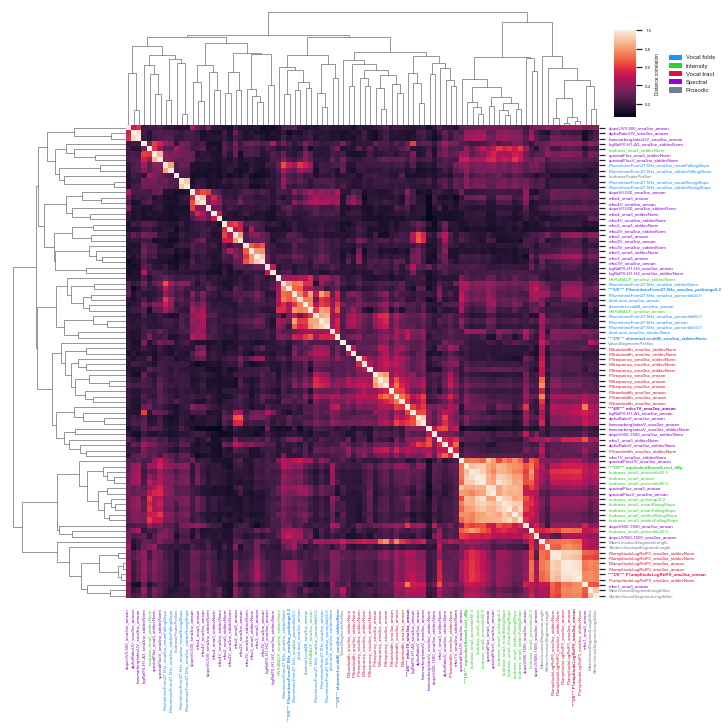

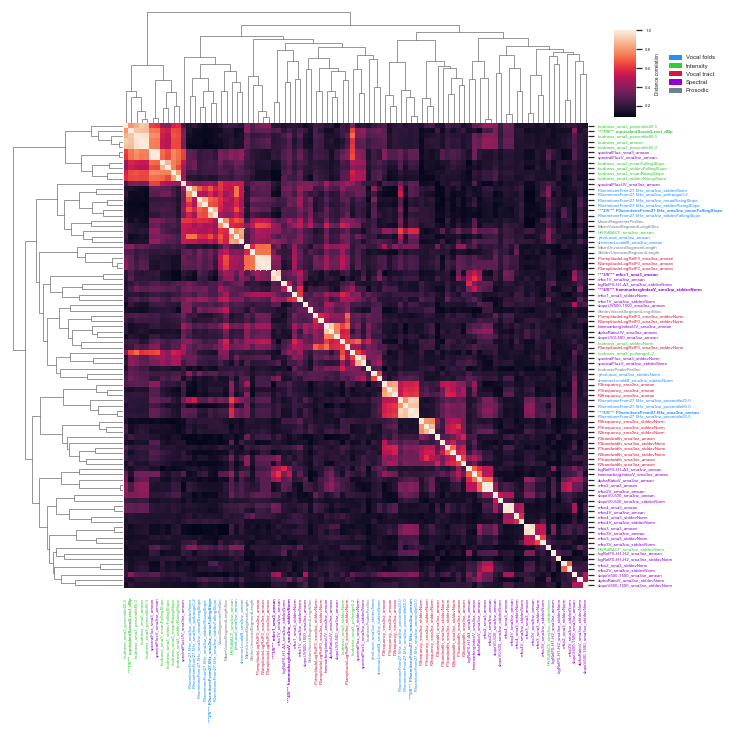

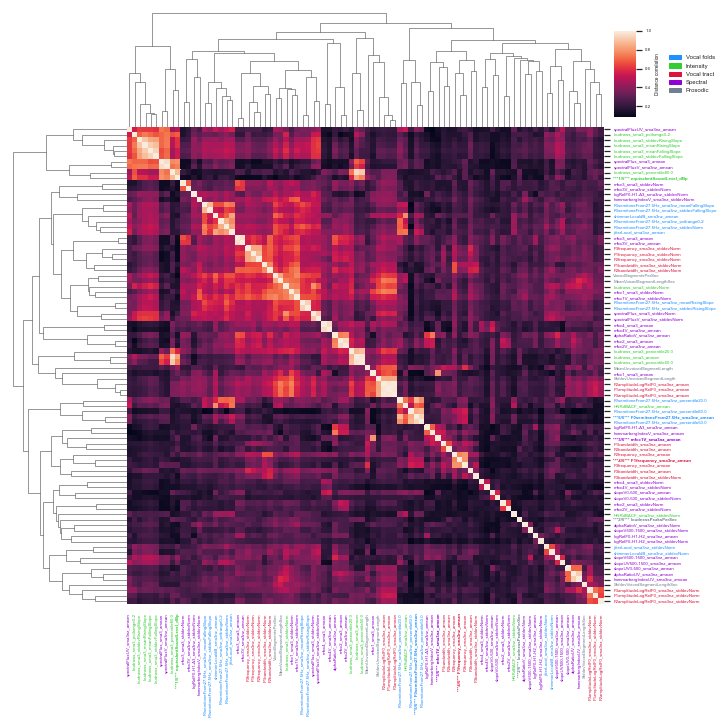

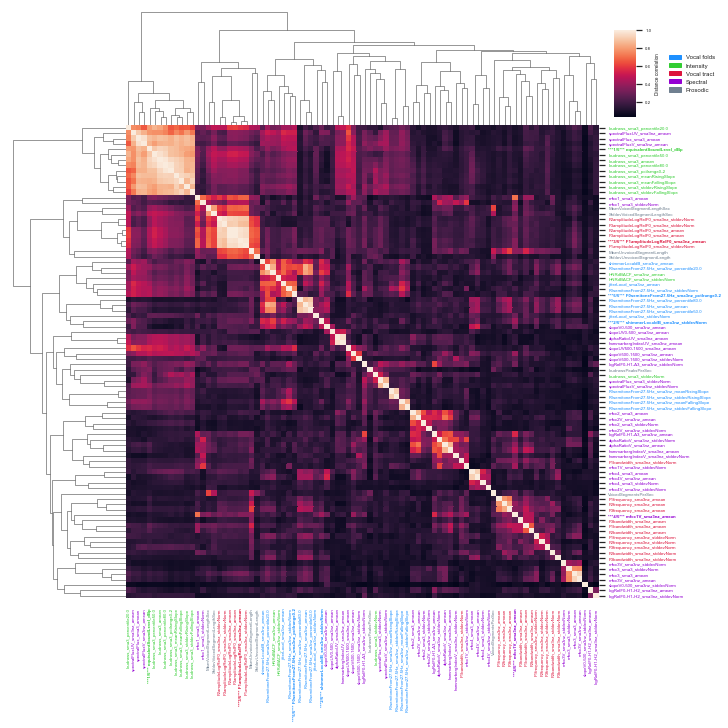

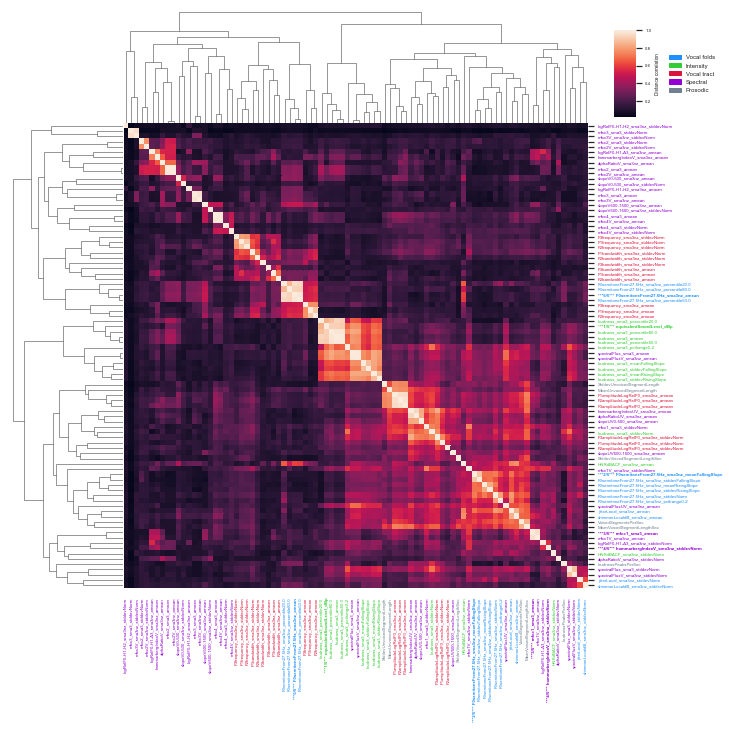

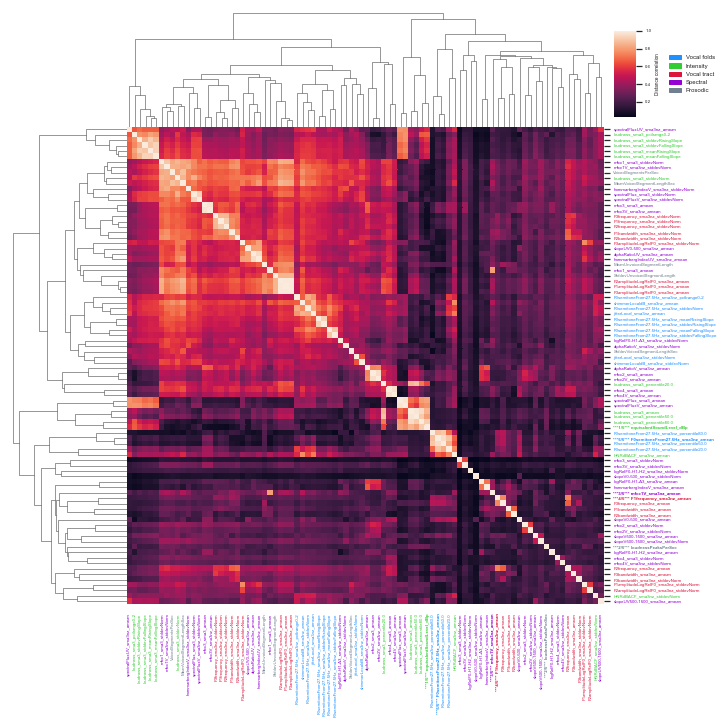

In [47]:
# Run all versions

input_dir = './data/output/vfp_v7_indfact/'
for group in ['controls', 'patients', 'both']:
    for data_type in ['speech', 'vowel', 'both']:
        
        
        
        egemaps = pd.read_csv(input_dir+f'egemaps_vector_{data_type}.csv', index_col=0)
        if group == 'both':
            pass
        elif group == 'controls':
            egemaps = egemaps[egemaps.sid.str.contains('Norm')]
        elif group == 'patients':
            egemaps = egemaps[~egemaps.sid.str.contains('Norm')]
        egemaps = egemaps.drop(['sid','token', 'target', 'filename'], axis=1)
        df = pairwise_dcor(egemaps)

        dcor_clustermap(df, output_dir = output_dir, group=group, data_type = data_type, rank_df=rank_df, savefig = True, color_code = True)



In [ ]:
# dcor_clustermap(df, output_dir = output_dir, group=group, data_type = data_type, rank_df=rank_df, savefig = True, color_code = True)